# Lab4 - Evaluation and visualization

In this lab we will be working on evaluation and visualization of active learning methods. Created functions can be used to measure performance of various active learning approaches and investigate chosen samples.

We will prepare:
- Function for plotting performance of active learning loop
- Function for active learning KPI computation
- Function for visualization of chosen samples



---


Today we will be using MNIST as an example dataset.
see: http://yann.lecun.com/exdb/mnist/

0. Lets load the data using sklearn.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True)

As usuall it is good to get some insight about the dataset(although probably most of data scientists worked with MNIST more than once).

In [11]:
print(f"X shape {X.shape}, type {type(X)}")
print(f"Unique classes {np.unique(y)}")

X shape (70000, 784), type <class 'pandas.core.frame.DataFrame'>
Unique classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [13]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# lets convert X to numpy array
X = X.to_numpy()

Lets print and plot one sample. In practice we can usually ask a client to present few examples of objects from the predicted domain with labels.

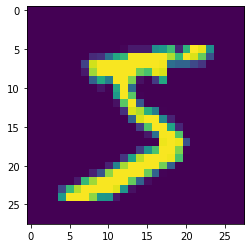

In [21]:
def imshow(x):
  img_size = int(np.sqrt(x.shape[-1]))
  x = x.reshape(img_size, img_size)
  plt.imshow(x)

imshow(X[0])

In [22]:
print(f"Label of sample {y[0]}")
print(f"Features of sample \n {X[0]}")

Label of sample 5
Features of sample 
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 24

1. Split the dataset in half. We will use half of the dataset for evaluation of our algorithms.

2. Use an active learning experiment loop developed on last lab session.(Improve the loop if neeeded)

Perform 2 experiments on the MNIST dataset, one with chosen informativeness and one with random as a baseline, perform each of them 5 times with different random seeds, although maintaing the same set of seeds across the runs(random vs inform).

Proposed setup:
- Initial batch size: 100 samples
- Number of iterations: 100
- Model: LogisticRegression
- Chosen batch size in each iteration: 1 sample

After every iteration make predictions on the evaluation dataset and measure the performance using selected metric.(e.g. BAC)

3. Create a function that will plot model performance across the iterations. It should:
- plot many experiments at once to let you compare their performance.
- plot the average value across multiple runs of each method with bold line
- plot single runs with partial transparency
- add a proper legend describing the lines, you can also add AUC to the legend 



4. Create a function for computing other AL KPIs.

Function given the set of model evaluation should return:
- performance of the model after `num_queries` queries
- how many queries where needed to achive `required_performance`
- area under the model performance curve
- mean standard deviation across different runs of the same method(measurement of stability) 



In [30]:
def evaluate_KPI(performance_measurments: np.array, num_queries: int, required_performance: float) -> pd.DataFrame:
  # TODO fill, you can extend the interface if needed
  return pd.DataFrame({f'performence_after_{num_queries}_queries': [],
                       f'{required_performance}_met_at': [],
                       'mean AUC': [],
                       'mean std': []})


5.* Now we will create a function to visualize chosen samples in one iteration of active learning loop.

Create an evaluation function for the loop that will for the given iteration index **k** collect indices of samples chosen in previous active learning loop steps and the samples chosen in the current iteration.

Run an experiment to collect such debug information for chosen informativeness.

Create a function that embeds all of the samples into 2d space using umap-learn library. Next plot this 2d space and color the samples according whether they were chosen in previous iterations or chosen in the indicated iteration or weren't chosen. Mark ground truth labels of the samples with different shapes of the points on the plot.

You can use UMAP for embedding https://umap-learn.readthedocs.io/en/latest/

In [33]:
# instal umap if not present
!pip install umap-learn

In [35]:
from umap import UMAP

embedder = UMAP()

emb = embedder.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


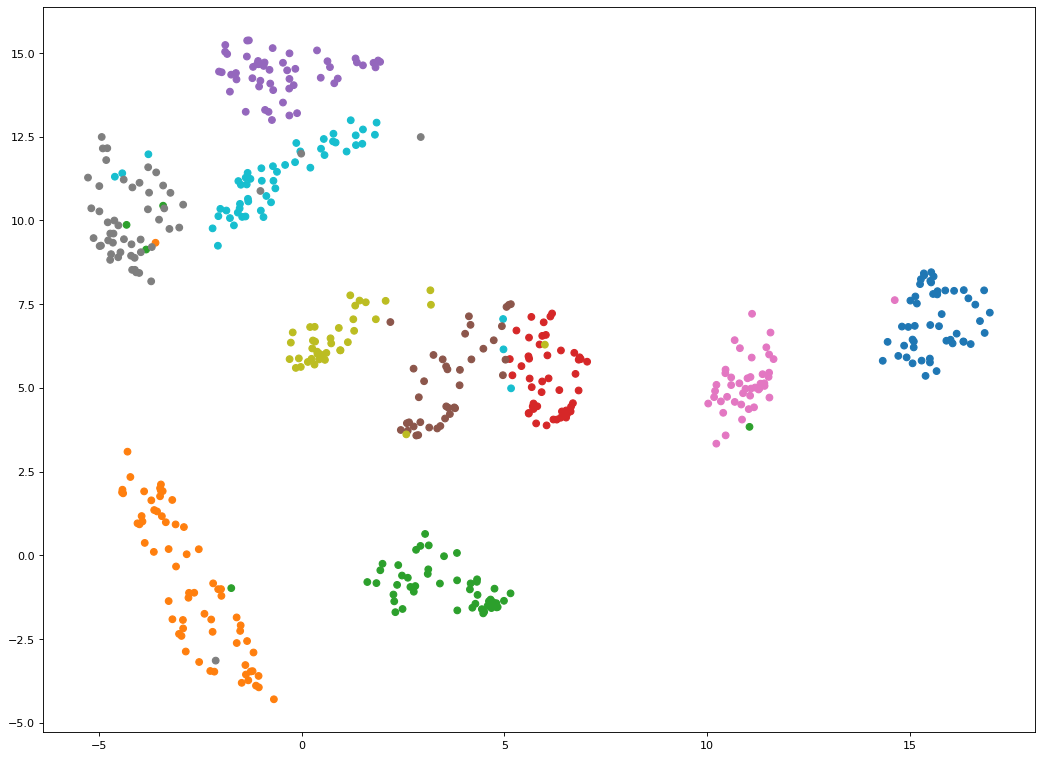

In [47]:
from matplotlib.pyplot import figure


colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

figure(figsize=(16, 12), dpi=80)
plt.scatter(emb[:500, 0], emb[:500, 1], c=colors[y[:500].to_numpy().astype(int)])